In [1]:
import numpy as np
from scipy.ndimage import laplace
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
nx,ny = 25,25

u0 = np.zeros((nx,ny))
def dudt(u, t, pos, phi, kappa, gamma, dx):
    du = np.zeros((nx,ny))
    for p in pos:
        du[p[0], p[1]] += phi
    u = u.reshape((nx,ny))
    delu = laplace(u, mode='nearest')
    du += kappa * delu / dx / dx
    du -= gamma * u
    return du.ravel()

phi = 1
kappa = 1e-9
dx = 1e-2 / (nx - 1)
t = np.linspace(0, 24 * 60 * 60, 200)

In [3]:
dx

0.0004166666666666667

In [4]:
t0L = np.zeros((0,))
for iter in range(100):
    pos = np.random.randint(0, nx-1, (10,2))
    #plt.plot(pos[:,0], pos[:,1], '.')
    u = odeint(dudt, u0.ravel(), t, args=(pos,phi,kappa,dx))
    u = u.reshape((200,nx,ny))
    umax = u.max()
    uthresh = u - umax * 0.25
    for p in pos:
        zero_crossings = np.where(np.diff(np.sign(uthresh[:,p[0],p[1]]), axis=0))[0]
        if len(zero_crossings)>0:
            t0L = np.append(t0L, zero_crossings[0])


TypeError: dudt() missing 1 required positional argument: 'dx'

In [5]:
t0H = np.zeros((0,))
for iter in range(100):
    pos = np.random.randint(0, nx-1, (5,2))
    #plt.plot(pos[:,0], pos[:,1], '.')
    u = odeint(dudt, u0.ravel(), t, args=(pos,phi,kappa,dx))
    u = u.reshape((200,nx,ny))
    umax = u.max()
    uthresh = u - umax * 0.25
    for p in pos:
        zero_crossings = np.where(np.diff(np.sign(uthresh[:,p[0],p[1]]), axis=0))[0]
        if len(zero_crossings)>0:
            t0H = np.append(t0H, zero_crossings[0])

TypeError: dudt() missing 1 required positional argument: 'dx'

Text(0, 0.5, 'Fequency (N=100 pads)')

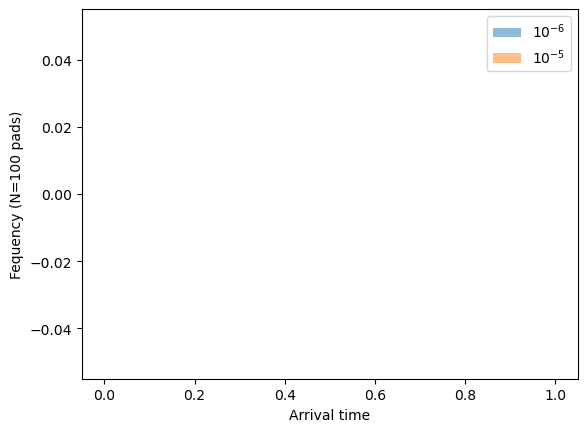

In [6]:
plt.hist(t0L * np.mean(np.diff(t)) / 3600, bins=10, alpha=0.5)
plt.hist(t0H * np.mean(np.diff(t)) / 3600, bins=10, alpha=0.5)
plt.legend(['$10^{-6}$', '$10^{-5}$'])
plt.xlabel('Arrival time')
plt.ylabel('Fequency (N=100 pads)')

In [7]:

for p in pos:
    zero_crossings = np.where(np.diff(np.sign(uthresh[:,p[0],p[1]]), axis=0))[0]
    print(zero_crossings)


NameError: name 'uthresh' is not defined

In [8]:
for t in range(200):
    plt.contour(uthresh[t,:,:], 0, origin='lower')
    plt.plot(pos[:,1], pos[:,0], 'w+')
    plt.savefig('pad_diffusion/diffusion_%04d.png'%t)
    plt.close()

NameError: name 'uthresh' is not defined

In [9]:
t0 = np.zeros((100,100)) + np.nan
for x in range(100):
    for y in range(100):
        zero_crossings = np.where(np.diff(np.sign(uthresh[:,x,y]), axis=0))[0]
        if len(zero_crossings)>0:
            t0[x,y] = zero_crossings[0]

NameError: name 'uthresh' is not defined

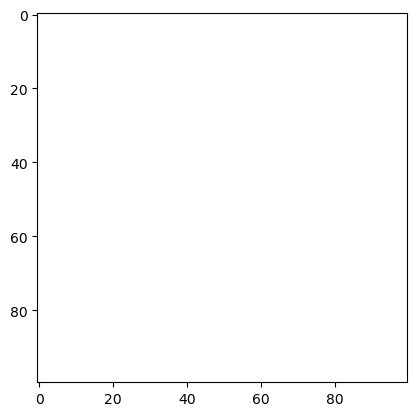

In [10]:
plt.imshow(t0)

Text(0.5, 0, 'Unit price of risk')

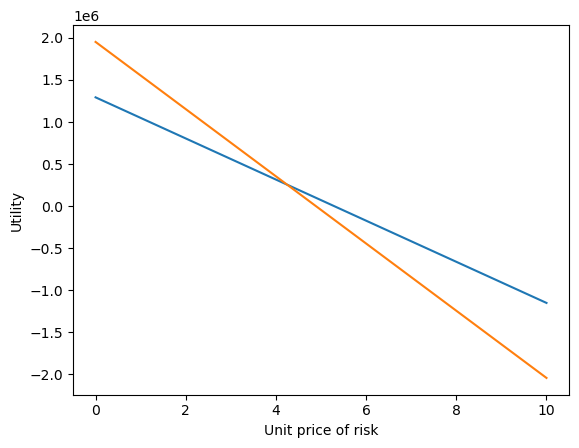

In [11]:
AL = 146283
sigmaL = 82188
NL = 8.84

AH = 404131
sigmaH = 181733
NH = 4.83

r = np.linspace(0, 10)
plt.plot(r, NL * AL - r * sigmaL * np.sqrt(NL))
plt.plot(r, NH * AH - r * sigmaH * np.sqrt(NH))
plt.ylabel('Utility')
plt.xlabel('Unit price of risk')

In [6]:
import json
f = open('Figures/metadata_pad.txt')
s = f.readline()
metadata = json.loads(s)
pos_list = metadata['InitialPositionList']
all_pos = [p['DeviceCoordinatesUm']['TIXYDrive'] for p in pos_list]
all_pos = np.array(all_pos) * 1e-6

pos1 = all_pos[[0,1],:]
pos2 = all_pos[[2,3,4,5,6,7,8],:]
pos3 = all_pos[[9,10,11,12,13],:]
pos4 = all_pos[[14,15,16],:]
pos5 = all_pos[[17,18,19,20,21,22,23,24,25],:]
pos6 = all_pos[[26,27,28,29,30,31],:]
pos7 = all_pos[[32,33,34,35],:]

pos1 = pos1 - pos1.mean(axis=0) + 5e-3
pos1 = pos1 / dx
pos1 = pos1.astype(int)

pos2 = pos2 - pos2.mean(axis=0) + 5e-3
pos2 = pos2 / dx
pos2 = pos2.astype(int)

pos3 = pos3 - pos3.mean(axis=0) + 5e-3
pos3 = pos3 / dx
pos3 = pos3.astype(int)

pos4 = pos4 - pos4.mean(axis=0) + 5e-3
pos4 = pos4 / dx
pos4 = pos4.astype(int)

pos5 = pos5 - pos5.mean(axis=0) + 5e-3
pos5 = pos5 / dx
pos5 = pos5.astype(int)

pos6 = pos6 - pos6.mean(axis=0) + 5e-3
pos6 = pos6 / dx
pos6 = pos6.astype(int)

pos7 = pos7 - pos7.mean(axis=0) + 5e-3
pos7 = pos7 / dx
pos7 = pos7.astype(int)

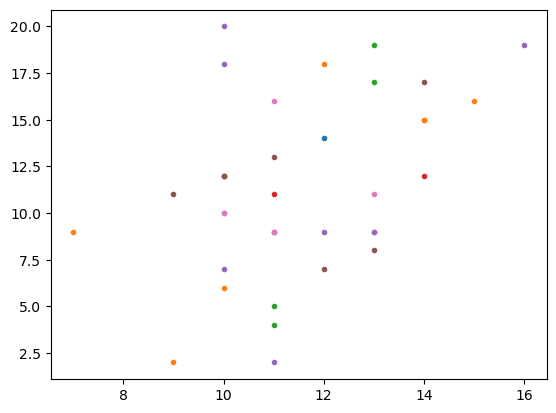

In [7]:
plt.plot(pos1[:,0], pos1[:,1], '.')
plt.plot(pos2[:,0], pos2[:,1], '.')
plt.plot(pos3[:,0], pos3[:,1], '.')
plt.plot(pos4[:,0], pos4[:,1], '.')
plt.plot(pos5[:,0], pos5[:,1], '.')
plt.plot(pos6[:,0], pos6[:,1], '.')
plt.plot(pos7[:,0], pos7[:,1], '.')

In [8]:
#t0_true1 = np.array([390, 371, 332, 259, 262, 252]) * 10 / 60
#t0_true2 = np.array([355, 323, 281]) * 10 / 60
#t0_true3 = np.array([374, 331]) * 10 / 60

t0_true = np.array([[182., 371.],
       [166., 324.],
       [165., 382.],
       [146., 340.],
       [161., 345.],
       [136., 268.],
       [128., 257.],
       [128., 259.],
       [155., 325.],
       [133., 312.],
       [133., 311.],
       [165., 356.],
       [154., 321.],
       [133., 294.],
       [55., 335.],
       [54., 292.],
       [51., 309.],
       [213., 397.],
       [188., 372.],
       [165., 326.],
       [125., 288.],
       [158., 309.],
       [158., 310.],
       [95., 191.],
       [188., 366.],
       [151., 338.],
       [164., 331.],
       [176., 338.],
       [169., 331.],
       [160., 286.],
       [170., 316.],
       [171., 348.],
       [181., 330.],
       [193., 353.],
       [198., 364.],
       [182., 339.]])
t0_true.shape

t0_true1 = t0_true[[0,1],1] * 10 / 60
t0_true2 = t0_true[[2,3,4,5,6,7,8],1] * 10 / 60
t0_true3 = t0_true[[9,10,11,12,13],1] * 10 / 60
t0_true4 = t0_true[[14,15,16],1] * 10 / 60
t0_true5 = t0_true[[17,18,19,20,21,22,23,24,25],1] * 10 / 60
t0_true6 = t0_true[[26,27,28,29,30,31],1] * 10 / 60
t0_true7 = t0_true[[32,33,34,35],1] * 10 / 60

In [9]:
def arrival_times(pos, phi, kappa, gamma, thresh, plot=False):
    u = odeint(dudt, u0.ravel(), t, args=(pos,phi,kappa,gamma,dx))
    u = u.reshape((200,nx,ny))
    if plot:
        plt.imshow(u[-1,:,:])
        plt.colorbar()
    umax = u.max()
    uthresh = u - thresh
    t0 = np.zeros((0,))
    for p in pos:
        zero_crossings = np.where(np.diff(np.sign(uthresh[:,p[0],p[1]]), axis=0))[0]
        if len(zero_crossings)>0:
            t0 = np.append(t0, zero_crossings[0])
        else:
            t0 = np.append(t0, np.nan)
    return t0 * np.mean(np.diff(t)) / 3600

In [10]:
phi = 1
kappa = 1e-10
gamma = 0
dx = 1e-2 / (nx - 1)
t = np.linspace(0, 72 * 60 * 60, 200)

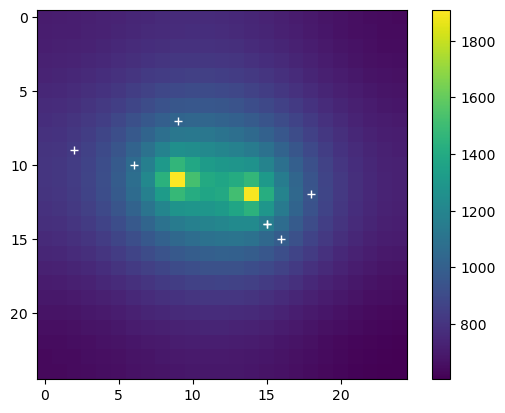

In [12]:
t01 = arrival_times(pos1, phi, kappa, gamma, 1300, plot=True)
t02 = arrival_times(pos2, phi, kappa, gamma, 1300, plot=False)
t03 = arrival_times(pos3, phi, kappa, gamma, 1300, plot=False)
t04 = arrival_times(pos4, phi, kappa, gamma, 1300, plot=False)
t05 = arrival_times(pos5, phi, kappa, gamma, 1300, plot=False)
t06 = arrival_times(pos6, phi, kappa, gamma, 1300, plot=False)
t07 = arrival_times(pos7, phi, kappa, gamma, 1300, plot=False)
plt.plot(pos2[:,1], pos2[:,0], 'w+')

[ 0.21450455 -5.53335294]
[[182. 371.]
 [166. 324.]
 [165. 382.]
 [146. 340.]
 [161. 345.]
 [136. 268.]
 [128. 257.]
 [128. 259.]
 [155. 325.]
 [133. 312.]
 [133. 311.]
 [165. 356.]
 [154. 321.]
 [133. 294.]
 [ 55. 335.]
 [ 54. 292.]
 [ 51. 309.]
 [213. 397.]
 [188. 372.]
 [165. 326.]
 [125. 288.]
 [158. 309.]
 [158. 310.]
 [ 95. 191.]
 [188. 366.]
 [151. 338.]
 [164. 331.]
 [176. 338.]
 [169. 331.]
 [160. 286.]
 [170. 316.]
 [171. 348.]
 [181. 330.]
 [193. 353.]
 [198. 364.]
 [182. 339.]]
[[1.         0.29038685]
 [0.29038685 1.        ]]


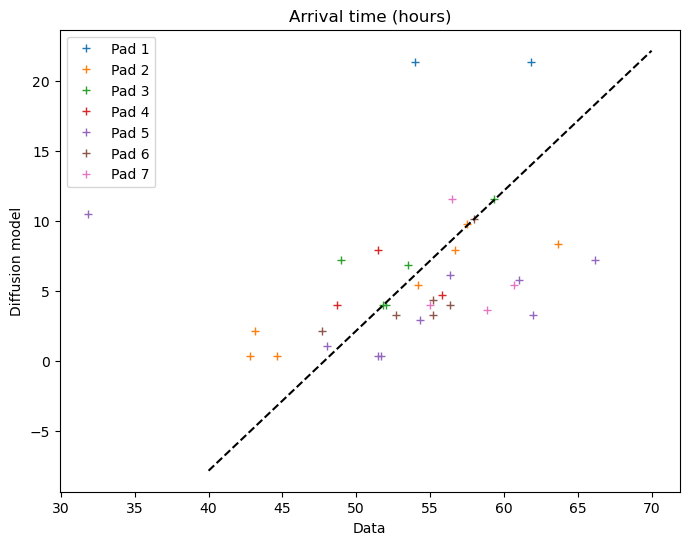

In [13]:
plt.figure(figsize=(8,6))

plt.plot(t0_true1, t01, '+')
plt.plot(t0_true2, t02, '+')
plt.plot(t0_true3, t03, '+')
plt.plot(t0_true4, t04, '+')
plt.plot(t0_true5, t05, '+')
plt.plot(t0_true6, t06, '+')
plt.plot(t0_true7, t07, '+')
x = np.concatenate([t0_true1,t0_true2,t0_true3,t0_true4,t0_true5,t0_true6,t0_true7])
y = np.concatenate([t01,t02,t03,t04,t05,t06,t07])
p = np.polyfit(x, y, deg=1)
print(p)
intercept = np.mean(y-x)
plt.plot([40,70], [intercept + 40, intercept + 70], 'k--')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Diffusion model')
plt.title('Arrival time (hours)')
print(t0_true)
plt.legend(['Pad 1', 'Pad 2', 'Pad 3', 'Pad 4', 'Pad 5', 'Pad 6', 'Pad 7',])

print(np.corrcoef(x,y))

In [14]:
nthresh = 10
thresh = np.linspace(0, 1e4, nthresh)
err = np.zeros((nthresh,len(pos1))) + np.nan
for ti in range(nthresh):
    t0 = arrival_times(pos1, phi, kappa, gamma, thresh[ti], plot=False)
    err[ti,:] = t0 - t0_true1


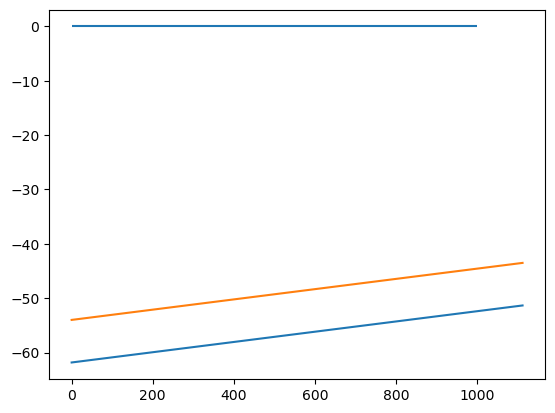

In [15]:
plt.plot(thresh, err)
plt.hlines([0], [0], [1e3])

In [16]:
def residuals(x):
    kappa, thresh, offset = np.exp(x)
    t01 = arrival_times(pos1, phi, kappa, gamma, thresh, plot=False)
    t02 = arrival_times(pos2, phi, kappa, gamma, thresh, plot=False)
    t03 = arrival_times(pos3, phi, kappa, gamma, thresh, plot=False)
    t04 = arrival_times(pos4, phi, kappa, gamma, thresh, plot=False)
    t05 = arrival_times(pos5, phi, kappa, gamma, thresh, plot=False)
    t06 = arrival_times(pos6, phi, kappa, gamma, thresh, plot=False)
    t07 = arrival_times(pos7, phi, kappa, gamma, thresh, plot=False)
    #idx = ~np.isnan(t0)
    #resid = np.zeros_like(t0) + 1e6
    #resid[idx] = t0[idx] - t0_true[idx]
    resid1 = t01 - t0_true1 + offset
    resid2 = t02 - t0_true2 + offset
    resid3 = t03 - t0_true3 + offset
    resid4 = t04 - t0_true4 + offset
    resid5 = t05 - t0_true5 + offset
    resid6 = t06 - t0_true6 + offset
    resid7 = t07 - t0_true7 + offset
    resid = np.concatenate([resid1,resid2,resid3,resid4,resid5,resid6,resid7])
    print(x)
    mse = np.sum(resid*resid)
    return mse
    #return resid

In [17]:
from scipy.optimize import least_squares, fmin

#res = least_squares(residuals, np.log([1500, 40]))
xopt = fmin(residuals, np.log([1e-10,1500, 40]))

[-23.02585093   7.31322039   3.68887945]
[-24.17714348   7.31322039   3.68887945]
[-23.02585093   7.67888141   3.68887945]
[-23.02585093   7.31322039   3.87332343]
[-23.79337929   6.94755937   3.8118421 ]
[-22.38624396   7.06944637   3.8938172 ]
[-23.7294186    7.25227688   3.74011389]
[-22.83396884   7.13038988   3.84258276]
[-22.38624396   7.06944637   3.8938172 ]
[-22.13040117   7.5569944    3.79134833]
[-23.37763476   7.09991813   3.80671866]
[-23.13245209   7.04913187   3.99287045]
[-23.18575267   6.91708762   4.14486594]
[-23.20351953   6.87307286   3.88812449]
[-22.73565888   6.93514495   4.00899981]
[-23.21714079   7.05872483   3.85728895]
[-23.53477277   6.8568965    3.98293982]
[-23.88517474   6.72014981   4.05311835]
[-23.36335547   6.79400933   4.05200089]
[-23.25369446   6.99254596   3.90596693]
[-23.41042668   7.05931002   4.03306031]
[-23.25524632   6.91963215   3.92435844]
[-23.56335695   6.79691787   3.88263968]
[-23.24017831   6.98607837   3.96531276]
[-23.4331038    

8.596669439789553e-11 1092.6187386847214 51.47926196811531
[ 0.08635561 -2.26929936]


array([[1.        , 0.34112076],
       [0.34112076, 1.        ]])

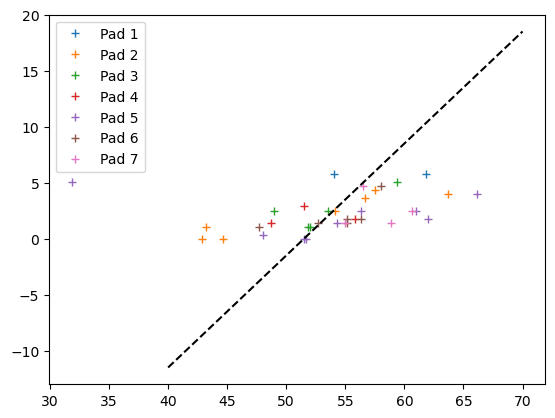

In [19]:
kappa0, thresh0, offset = np.exp(xopt)
print(kappa0, thresh0, offset)

t01 = arrival_times(pos1, phi, kappa0, gamma, thresh0)
plt.plot(t0_true1, t01, '+')

t02 = arrival_times(pos2, phi, kappa0, gamma, thresh0)
plt.plot(t0_true2, t02, '+')

t03 = arrival_times(pos3, phi, kappa0, gamma, thresh0)
plt.plot(t0_true3, t03, '+')

t04 = arrival_times(pos4, phi, kappa0, gamma, thresh0)
plt.plot(t0_true4, t04, '+')

t05 = arrival_times(pos5, phi, kappa0, gamma, thresh0)
plt.plot(t0_true5, t05, '+')

t06 = arrival_times(pos6, phi, kappa0, gamma, thresh0)
plt.plot(t0_true6, t06, '+')

t07 = arrival_times(pos7, phi, kappa0, gamma, thresh0)
plt.plot(t0_true7, t07, '+')

plt.legend(['Pad 1', 'Pad 2', 'Pad 3', 'Pad 4', 'Pad 5', 'Pad 6', 'Pad 7',])

x = np.concatenate([t0_true1,t0_true2,t0_true3,t0_true4,t0_true5,t0_true6,t0_true7])
y = np.concatenate([t01,t02,t03,t04,t05,t06,t07])
p = np.polyfit(x, y, deg=1)
print(p)
intercept = np.mean(y-x)
plt.plot([40,70], [intercept + 40, intercept + 70], 'k--')

np.corrcoef(x,y)

In [20]:
resid = residuals(np.log([1400,40]))

ValueError: not enough values to unpack (expected 3, got 2)